# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. Dataset didapat dari Kaggle: [https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk
     - *Numerikal*: Misalnya usia, pendapatan, harga

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

4. **Informasi Dataset**:
**4. Informasi Dataset:**  
- **Order_ID**: Identifikasi unik untuk setiap pesanan yang mengelompokkan beberapa produk dalam satu pesanan.  
- **Customer_ID**: Identifikasi unik untuk setiap pelanggan guna membedakan pembeli individu.  
- **Customer_Type**: Menunjukkan apakah pelanggan termasuk dalam kategori B2B (business-to-business) atau B2C (business-to-consumer).  
- **Product**: Nama produk yang dibeli, misalnya "Coca-Cola" atau "Erdinger Weißbier".  
- **Category**: Kategori produk, seperti "Minuman Ringan" atau "Minuman Beralkohol".  
- **Unit_Price**: Harga per unit dari produk yang dibeli.  
- **Quantity**: Jumlah unit produk yang dibeli dalam satu pesanan.  
- **Discount**: Potongan harga yang diberikan pada produk (misalnya, 0.1 untuk diskon 10%). Diskon hanya berlaku untuk pelanggan B2B.  
- **Total_Price**: Total harga produk setelah diskon diterapkan.  
- **Region**: Wilayah pelanggan, seperti "Bayern" atau "Berlin".  
- **Order_Date**: Tanggal saat pesanan dilakukan.

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [ ]:
beverage_sales = pd.read_csv("D:/Coding Camp 2025 DBS Foundation (Dicoding)/beverage_sales.csv")
beverage_sales

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
...,...,...,...,...,...,...,...,...,...,...,...
8999905,ORD2999999,CUS7080,B2C,Schwip Schwap,Soft Drinks,1.27,2,0.00,2.54,Sachsen,2023-07-03
8999906,ORD2999999,CUS7080,B2C,San Pellegrino,Water,0.91,15,0.00,13.65,Sachsen,2023-07-03
8999907,ORD3000000,CUS6551,B2B,Red Bull,Soft Drinks,2.94,64,0.10,169.34,Sachsen-Anhalt,2022-04-09
8999908,ORD3000000,CUS6551,B2B,Passion Fruit Juice,Juices,4.04,79,0.10,287.24,Sachsen-Anhalt,2022-04-09


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# untuk menghindari customer segmentation, maka beberapa fitur dan ID akan didrop dari dataset

beverage_sales = beverage_sales.drop(columns=["Order_ID", "Customer_ID", "Customer_Type", "Region", "Order_Date"])

In [ ]:
# saran minimal dataset adalah 2500. diambil 3000 baris data secara random

if len(beverage_sales) > 3000:
    beverage_sales_new = beverage_sales.sample(n=3000, random_state=42)

In [ ]:
beverage_sales_new.to_csv('Dataset_clustering.csv', index=False)

In [ ]:
bevsales = pd.read_csv("D:\Coding Camp 2025 DBS Foundation (Dicoding)\Dataset_clustering.csv")
bevsales

,Product,Category,Unit_Price,Quantity,Discount,Total_Price
0,Hohes C Orange,Juices,1.87,74,0.10,124.54
1,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98
2,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61
3,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13
4,Granini Apple,Juices,1.64,4,0.00,6.56
...,...,...,...,...,...,...
2995,Jack Daniels,Alcoholic Beverages,52.27,88,0.05,4369.77
2996,Evian,Water,1.26,12,0.00,15.12
2997,Vio Wasser,Water,1.71,11,0.00,18.81
2998,Granini Apple,Juices,1.46,14,0.05,19.42


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1. Memahami Struktur Data

In [ ]:
bevsales.shape

(3000, 6)

In [ ]:
bevsales.dtypes

Product         object
Category        object
Unit_Price     float64
Quantity         int64
Discount       float64
Total_Price    float64
dtype: object

In [ ]:
bevsales.describe(include= "all")

,Product,Category,Unit_Price,Quantity,Discount,Total_Price
count,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000
unique,47,4,NaN,NaN,NaN,NaN
top,Mango Juice,Water,NaN,NaN,NaN,NaN
freq,118,774,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.018690,22.615667,0.029100,141.457933
std,NaN,NaN,15.627095,26.751869,0.044409,573.146390
min,NaN,NaN,0.330000,1.000000,0.000000,0.460000
25%,NaN,NaN,1.040000,6.000000,0.000000,8.002500
50%,NaN,NaN,1.710000,11.000000,0.000000,20.460000
75%,NaN,NaN,3.120000,27.000000,0.050000,68.155000


#### 2. Menangani Data yang Hilang

In [ ]:
bevsales.isnull().sum()

Product        0
Category       0
Unit_Price     0
Quantity       0
Discount       0
Total_Price    0
dtype: int64

keterangan: tidak ada missing value

#### 3. Analisis Distribusi dan Korelasi

In [ ]:
num_vars = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
cat_vars = ["Product", "Category"]

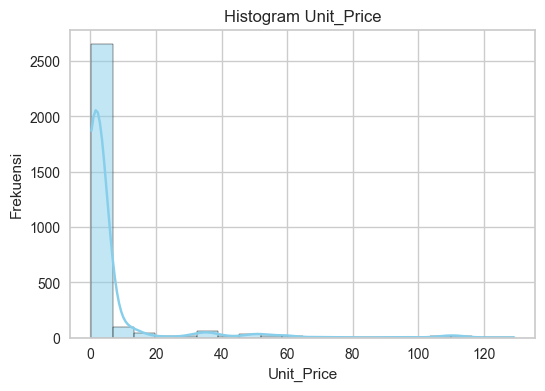

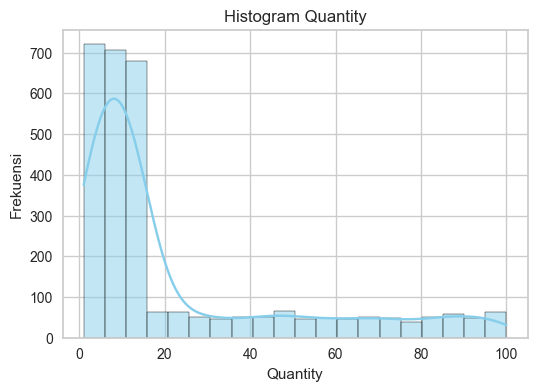

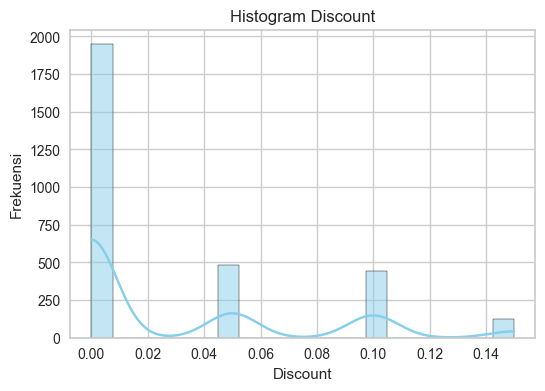

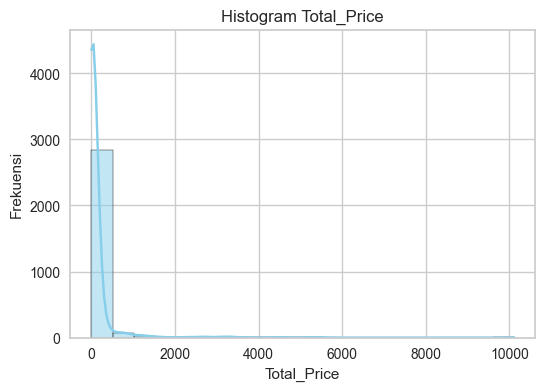

In [ ]:
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(bevsales[var], bins=20, kde=True, color="skyblue")
    plt.title(f'Histogram {var}')
    plt.xlabel(var)
    plt.ylabel("Frekuensi")
    plt.grid(True)
    plt.show()

In [ ]:
corr_matrix = bevsales.corr(numeric_only=True)
corr_matrix

,Unit_Price,Quantity,Discount,Total_Price
Unit_Price,1.000000,0.041533,0.023259,0.649380
Quantity,0.041533,1.000000,0.821073,0.317501
Discount,0.023259,0.821073,1.000000,0.258633
Total_Price,0.649380,0.317501,0.258633,1.000000


#### 4. Visualisasi Data

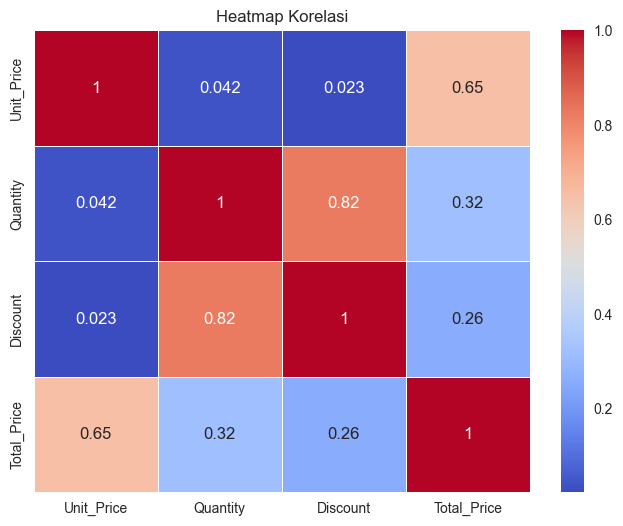

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\485706867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bevsales[var], palette="viridis", order=bevsales[var].value_counts().index)


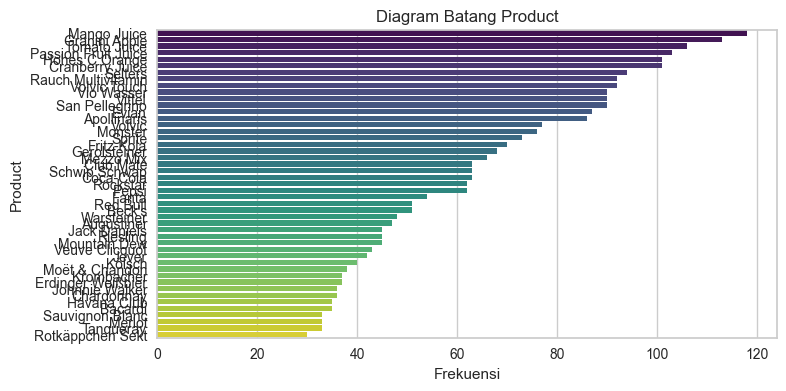

C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\485706867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bevsales[var], palette="viridis", order=bevsales[var].value_counts().index)


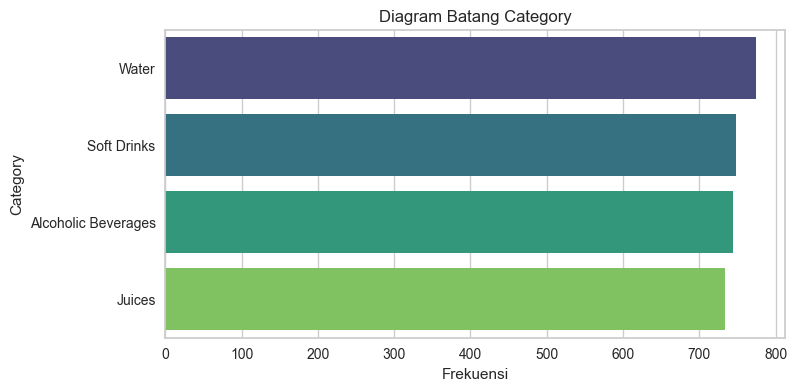

In [ ]:
for var in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=bevsales[var], palette="viridis", order=bevsales[var].value_counts().index)
    plt.title(f'Diagram Batang {var}')
    plt.xlabel("Frekuensi")
    plt.ylabel(var)
    plt.grid(True, axis="x")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
bevsales.isnull().sum()

Product        0
Category       0
Unit_Price     0
Quantity       0
Discount       0
Total_Price    0
dtype: int64

In [ ]:
bevsales.duplicated().sum()

677

In [ ]:
bevsales.drop_duplicates(inplace=True)

In [ ]:
bevsales

,Product,Category,Unit_Price,Quantity,Discount,Total_Price
0,Hohes C Orange,Juices,1.87,74,0.10,124.54
1,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98
2,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61
3,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13
4,Granini Apple,Juices,1.64,4,0.00,6.56
...,...,...,...,...,...,...
2995,Jack Daniels,Alcoholic Beverages,52.27,88,0.05,4369.77
2996,Evian,Water,1.26,12,0.00,15.12
2997,Vio Wasser,Water,1.71,11,0.00,18.81
2998,Granini Apple,Juices,1.46,14,0.05,19.42


In [ ]:
bevsales.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,2323.000000,2323.000000,2323.000000,2323.000000
mean,6.532269,26.913043,0.037581,172.663349
std,16.405584,28.933054,0.047205,645.031663
min,0.330000,1.000000,0.000000,0.460000
25%,1.055000,6.000000,0.000000,9.095000
50%,1.740000,13.000000,0.000000,25.650000
75%,3.185000,44.000000,0.050000,88.380000
max,129.240000,100.000000,0.150000,10111.960000


keterangan: dilihat pada 'std' ternyata variasi nilai cukup besar, sehingga perlu adanya normalisasi/standardisasi. oleh karena itu, peneliti memutuskan untuk melihat karakteristik dari variabel satu persatu

#### a. Unit_Price

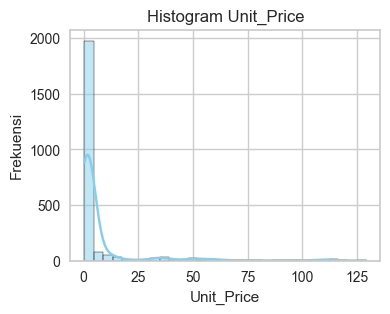

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(bevsales["Unit_Price"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Unit_Price")
plt.xlabel("Unit_Price")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

keterangan: disrtibusi sangat skew ke kanan, sehingga dilakukan log-transformasi

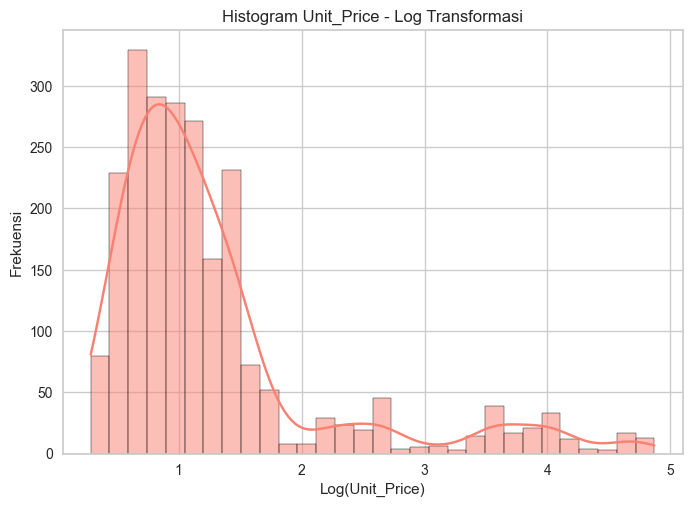

In [ ]:
# Log Transformasi

bevsales["Unit_Price_Log"] = np.log1p(bevsales["Unit_Price"])
sns.histplot(bevsales["Unit_Price_Log"], bins=30, kde=True, color="salmon")
plt.title("Histogram Unit_Price - Log Transformasi")
plt.xlabel("Log(Unit_Price)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

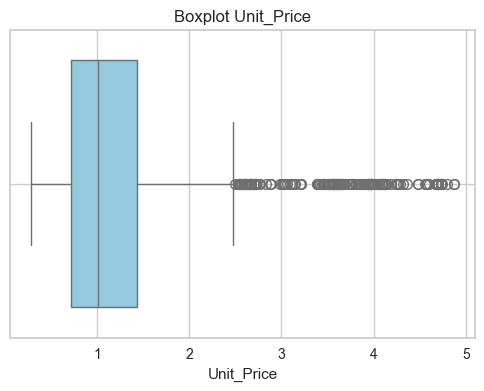

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=bevsales["Unit_Price_Log"], color="skyblue")
plt.title("Boxplot Unit_Price")
plt.xlabel("Unit_Price")
plt.grid(True)
plt.show()

keterangan: karena banyak outlier ekstrem, maka digunakan standardisasi karena lebih robust terhadap outlier

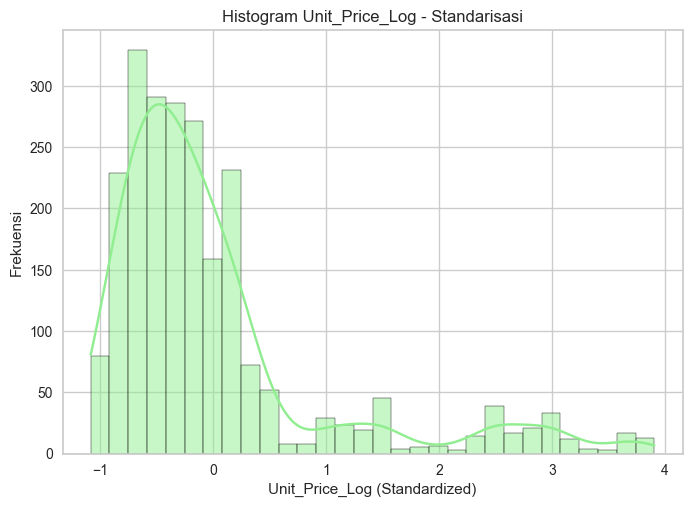

In [ ]:
# Standarisasi

scaler = StandardScaler()
bevsales['Unit_Price_Log_Std'] = scaler.fit_transform(bevsales[['Unit_Price_Log']])

sns.histplot(bevsales['Unit_Price_Log_Std'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram Unit_Price_Log - Standarisasi')
plt.xlabel('Unit_Price_Log (Standardized)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

#### b. Quantity

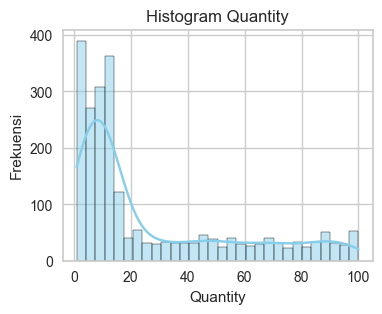

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(bevsales["Quantity"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

keterangan: skew ke kanan, sehingga perlu di transformasi (log)

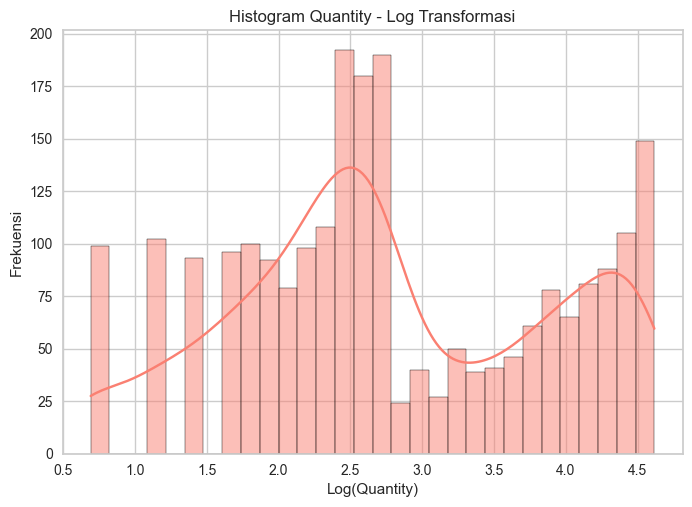

In [ ]:
bevsales["Quantity_Log"] = np.log1p(bevsales["Quantity"])
sns.histplot(bevsales["Quantity_Log"], bins=30, kde=True, color="salmon")
plt.title("Histogram Quantity - Log Transformasi")
plt.xlabel("Log(Quantity)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

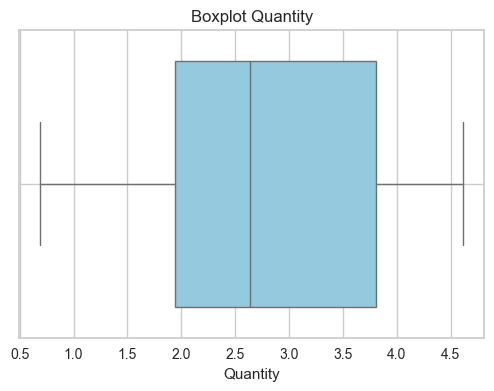

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=bevsales["Quantity_Log"], color="skyblue")
plt.title("Boxplot Quantity")
plt.xlabel("Quantity")
plt.grid(True)
plt.show()

keterangan: karena tidak ada outlier, sehingga digunakan normalisasi (min-max scaling)

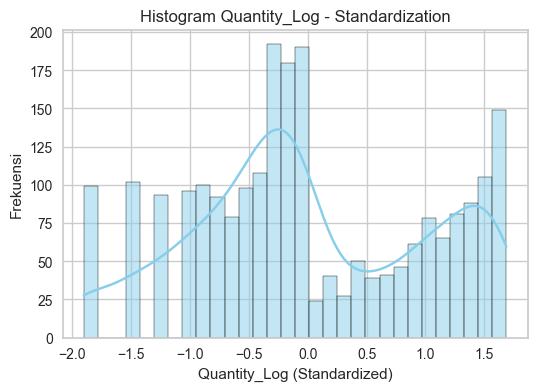

In [ ]:
scaler = StandardScaler()
bevsales["Quantity_Log_Std"] = scaler.fit_transform(bevsales[["Quantity_Log"]])

plt.figure(figsize=(6, 4))
sns.histplot(bevsales["Quantity_Log_Std"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Quantity_Log - Standardization")
plt.xlabel("Quantity_Log (Standardized)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

#### c. Discount

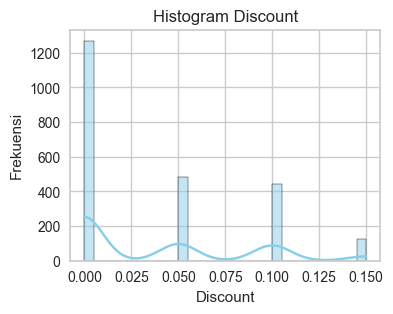

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(bevsales["Discount"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Discount")
plt.xlabel("Discount")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

keterangan: tidak perlu ada transformasi atau normalisasi/standardisasi

#### d. Total_Price

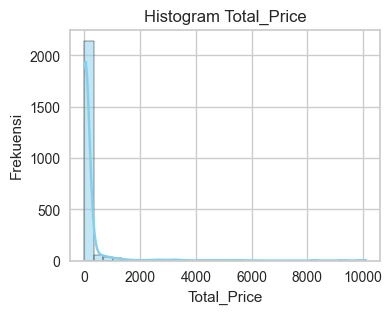

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(bevsales["Total_Price"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Total_Price")
plt.xlabel("Total_Price")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

keterangan: skew ke kanan, dengan rentang nilai tinggi sehingga perlu dilakukan transformasi

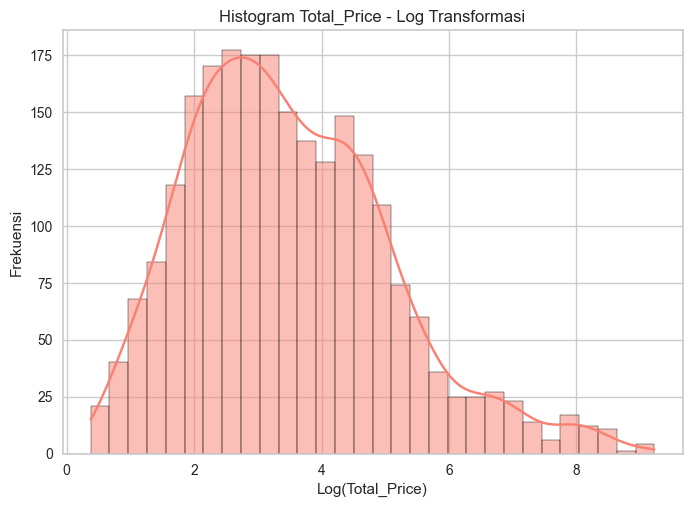

In [ ]:
bevsales["Total_Price_Log"] = np.log1p(bevsales["Total_Price"])
sns.histplot(bevsales["Total_Price_Log"], bins=30, kde=True, color="salmon")
plt.title("Histogram Total_Price - Log Transformasi")
plt.xlabel("Log(Total_Price)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

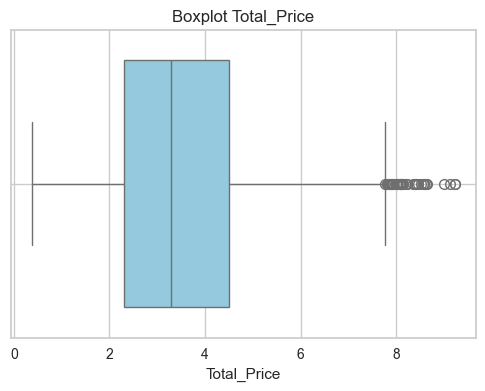

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=bevsales["Total_Price_Log"], color="skyblue")
plt.title("Boxplot Total_Price")
plt.xlabel("Total_Price")
plt.grid(True)
plt.show()

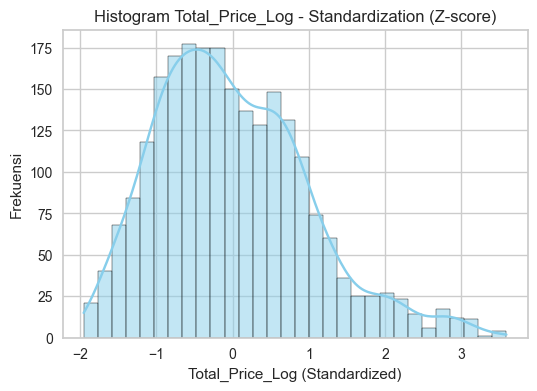

In [ ]:
scaler = StandardScaler()
bevsales["Total_Price_Log_Std"] = scaler.fit_transform(bevsales[["Total_Price_Log"]])

plt.figure(figsize=(6, 4))
sns.histplot(bevsales["Total_Price_Log_Std"], bins=30, kde=True, color="skyblue")
plt.title("Histogram Total_Price_Log - Standardization (Z-score)")
plt.xlabel("Total_Price_Log (Standardized)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

### Pemeriksaan Kembali

In [ ]:
newbevsales = bevsales[["Product", "Category", "Unit_Price_Log_Std", "Quantity_Log_Std", "Discount", "Total_Price_Log_Std"]]
newbevsales.head()

,Product,Category,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
0,Hohes C Orange,Juices,-0.247533,1.415232,0.10,0.838416
1,Fritz-Kola,Soft Drinks,-0.247533,0.158149,0.05,0.000276
2,Merlot,Alcoholic Beverages,1.400071,1.377858,0.15,1.940162
3,Moët & Chandon,Alcoholic Beverages,3.163660,1.602278,0.10,3.187239
4,Granini Apple,Juices,-0.338455,-1.064099,0.00,-0.923331


keterangan: variabel 'newbevsales' yang akan dipakai selanjutnya

In [ ]:
newbevsales.describe()

,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
count,2.323000e+03,2.323000e+03,2323.000000,2.323000e+03
mean,2.141110e-17,1.896412e-16,0.037581,-3.976348e-17
std,1.000215e+00,1.000215e+00,0.047205,1.000215e+00
min,-1.084699e+00,-1.903001e+00,0.000000,-1.954409e+00
25%,-6.111189e-01,-7.560451e-01,0.000000,-7.420184e-01
50%,-2.979869e-01,-1.214403e-01,0.000000,-1.333481e-01
75%,1.630259e-01,9.475502e-01,0.050000,6.254025e-01
max,3.904994e+00,1.687727e+00,0.150000,3.590334e+00


keterangan: pada statistik deskriptif di atas, ditunjukkan variasi yang kecil (standar deviasi)

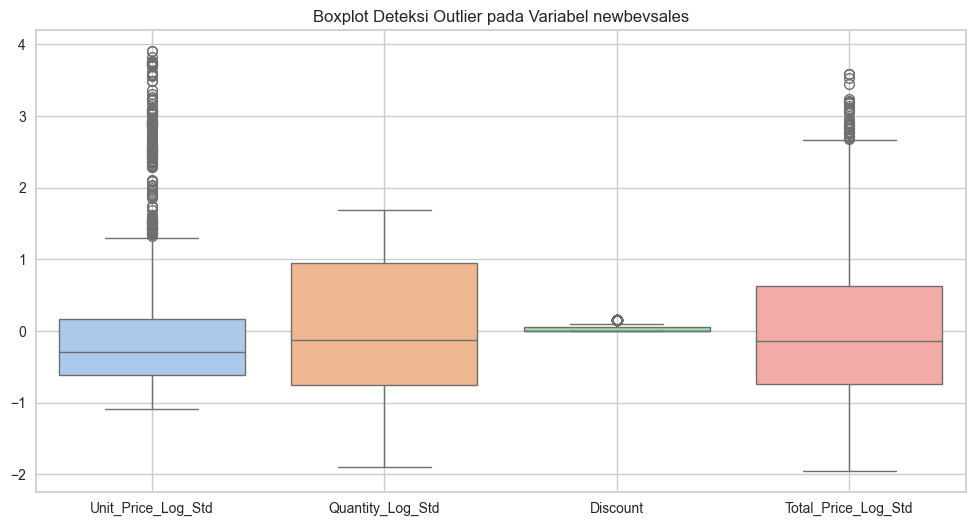

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=newbevsales, palette="pastel")
plt.title("Boxplot Deteksi Outlier pada Variabel newbevsales")
plt.grid(True)
plt.show()

keterangan: karena outlier terdeteksi banyak, sehingga dilakukan penghapusan saja (dataset besar)

In [ ]:
numeric_cols = newbevsales.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = newbevsales[col].quantile(0.25)
    Q3 = newbevsales[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    newbevsales = newbevsales[(newbevsales[col] >= lower_bound) & (newbevsales[col] <= upper_bound)]

print("Data setelah penghapusan outlier:")
print(newbevsales.describe())

Data setelah penghapusan outlier:
       Unit_Price_Log_Std  Quantity_Log_Std     Discount  Total_Price_Log_Std
count         1968.000000       1968.000000  1968.000000          1968.000000
mean            -0.304685         -0.079720     0.031072            -0.255713
std              0.453687          0.966586     0.039715             0.774420
min             -1.084699         -1.903001     0.000000            -1.954409
25%             -0.635215         -0.756045     0.000000            -0.837432
50%             -0.359267         -0.189289     0.000000            -0.311302
75%             -0.047189          0.768338     0.050000             0.323196
max              1.296831          1.687727     0.100000             2.035916


In [ ]:
newbevsales

,Product,Category,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
0,Hohes C Orange,Juices,-0.247533,1.415232,0.10,0.838416
1,Fritz-Kola,Soft Drinks,-0.247533,0.158149,0.05,0.000276
4,Granini Apple,Juices,-0.338455,-1.064099,0.00,-0.923331
5,Riesling,Alcoholic Beverages,1.068988,1.006638,0.05,1.542487
6,Pepsi,Soft Drinks,-0.297987,-0.897176,0.00,-0.767045
...,...,...,...,...,...,...
2994,Passion Fruit Juice,Juices,-0.092280,-1.064099,0.05,-0.761895
2996,Evian,Water,-0.507616,-0.189289,0.00,-0.448564
2997,Vio Wasser,Water,-0.309970,-0.262572,0.00,-0.319321
2998,Granini Apple,Juices,-0.415319,-0.058275,0.05,-0.300305


### Encoding (Data Kategorik)

In [ ]:
label_encoder = LabelEncoder()

newbevsales["Product_Label"] = label_encoder.fit_transform(newbevsales["Product"])
newbevsales["Category_Label"] = label_encoder.fit_transform(newbevsales["Category"])

print(newbevsales[["Product", "Product_Label", "Category", "Category_Label"]].head())

          Product  Product_Label             Category  Category_Label
0  Hohes C Orange             13               Juices               1
1      Fritz-Kola             10          Soft Drinks               2
4   Granini Apple             12               Juices               1
5        Riesling             26  Alcoholic Beverages               0
6           Pepsi             23          Soft Drinks               2


In [ ]:
unique_products = bevsales["Product"].unique()
print("Nilai unik pada kolom Product:")
print(unique_products)

unique_categories = bevsales["Category"].unique()
print("\nNilai unik pada kolom Category:")
print(unique_categories)

Nilai unik pada kolom Product:
['Hohes C Orange' 'Fritz-Kola' 'Merlot' 'Moët & Chandon' 'Granini Apple'
 'Riesling' 'Pepsi' 'Havana Club' 'Vio Wasser' 'Schwip Schwap' 'Evian'
 'Cranberry Juice' 'Tomato Juice' 'Passion Fruit Juice' 'Mango Juice'
 'Rauch Multivitamin' 'Apollinaris' 'Johnnie Walker' 'Erdinger Weißbier'
 'Volvic' 'Red Bull' "Beck's" 'Club Mate' 'Selters' 'Mezzo Mix' 'Fanta'
 'Sprite' 'Augustiner' 'Volvic Touch' 'Monster' 'Rockstar' 'Coca-Cola'
 'Bacardi' 'Chardonnay' 'San Pellegrino' 'Gerolsteiner' 'Kölsch'
 'Veuve Clicquot' 'Vittel' 'Mountain Dew' 'Warsteiner' 'Krombacher'
 'Jack Daniels' 'Sauvignon Blanc' 'Jever' 'Tanqueray' 'Rotkäppchen Sekt']

Nilai unik pada kolom Category:
['Juices' 'Soft Drinks' 'Alcoholic Beverages' 'Water']


In [ ]:
newbevsales.head()

,Product,Category,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std,Product_Label,Category_Label
0,Hohes C Orange,Juices,-0.247533,1.415232,0.10,0.838416,13,1
1,Fritz-Kola,Soft Drinks,-0.247533,0.158149,0.05,0.000276,10,2
4,Granini Apple,Juices,-0.338455,-1.064099,0.00,-0.923331,12,1
5,Riesling,Alcoholic Beverages,1.068988,1.006638,0.05,1.542487,26,0
6,Pepsi,Soft Drinks,-0.297987,-0.897176,0.00,-0.767045,23,2


C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\290837691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=newbevsales["Product_Label"], palette="viridis")


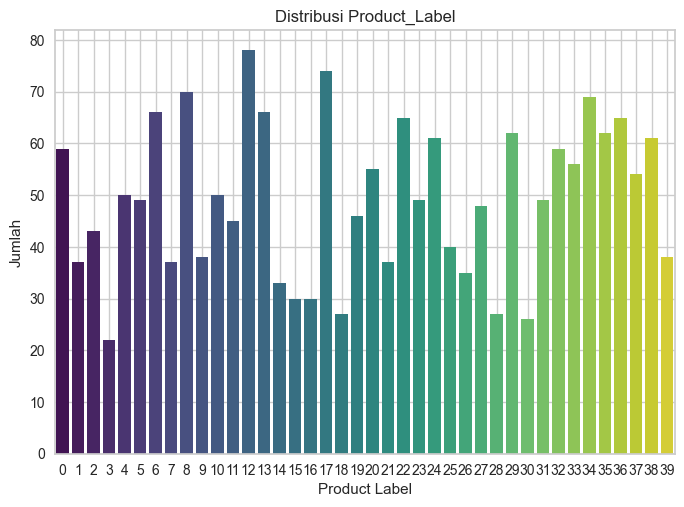

C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\290837691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=newbevsales["Category_Label"], palette="viridis")


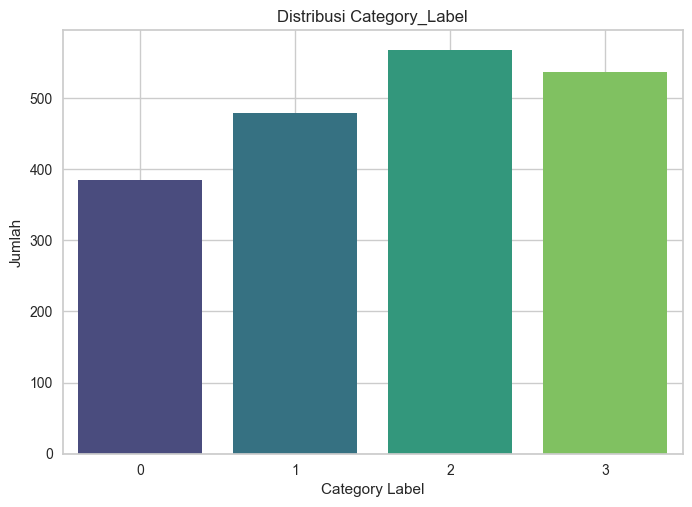

In [ ]:
sns.countplot(x=newbevsales["Product_Label"], palette="viridis")
plt.title("Distribusi Product_Label")
plt.xlabel("Product Label")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

sns.countplot(x=newbevsales["Category_Label"], palette="viridis")
plt.title("Distribusi Category_Label")
plt.xlabel("Category Label")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

keterangan: jika dilihat dari count plot di atas, sampling di tiap kategori tidak ada yang sangat rendah. sehingga sampling untuk data ini dinilai seimbang (no undersampling/oversampling)

### Pemeriksaan Kembali

In [ ]:
nbs_df = newbevsales[["Product_Label", "Category_Label", "Unit_Price_Log_Std", "Quantity_Log_Std", "Discount", "Total_Price_Log_Std"]]
nbs_df.head()

,Product_Label,Category_Label,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
0,13,1,-0.247533,1.415232,0.10,0.838416
1,10,2,-0.247533,0.158149,0.05,0.000276
4,12,1,-0.338455,-1.064099,0.00,-0.923331
5,26,0,1.068988,1.006638,0.05,1.542487
6,23,2,-0.297987,-0.897176,0.00,-0.767045


keterangan: variabel 'nbs_df' digunakan untuk teknik clustering selanjutnya

In [ ]:
# Pemeriksaan outlier secara multivariat menggunakan Local Outlier Factor (LOF)
features = nbs_df[["Unit_Price_Log_Std", "Quantity_Log_Std", "Discount", "Total_Price_Log_Std"]]

for n in [10, 15, 20, 25]:
    lof = LocalOutlierFactor(n_neighbors=n)
    nbs_df["LOF_Score"] = lof.fit_predict(features)
    outliers = nbs_df[nbs_df["LOF_Score"] == -1]
    print(f"n_neighbors = {n} | Jumlah outlier: {outliers.shape[0]}")

n_neighbors = 10 | Jumlah outlier: 40
n_neighbors = 15 | Jumlah outlier: 30
n_neighbors = 20 | Jumlah outlier: 29
n_neighbors = 25 | Jumlah outlier: 41


C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\292839649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbs_df["LOF_Score"] = lof.fit_predict(features)
C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\292839649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbs_df["LOF_Score"] = lof.fit_predict(features)
C:\Users\cikar\AppData\Local\Temp\ipykernel_18500\292839649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
# Menghapus data yang terdeteksi sebagai outlier (LOF_Score = -1)
nbs_df_clean = nbs_df[nbs_df["LOF_Score"] != -1]
nbs_df_clean = nbs_df_clean.drop(columns=["LOF_Score"])

print("Jumlah data setelah menghapus outlier:", nbs_df_clean.shape[0])
nbs_df_clean.head()

Jumlah data setelah menghapus outlier: 1927


,Product_Label,Category_Label,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
0,13,1,-0.247533,1.415232,0.10,0.838416
1,10,2,-0.247533,0.158149,0.05,0.000276
4,12,1,-0.338455,-1.064099,0.00,-0.923331
5,26,0,1.068988,1.006638,0.05,1.542487
6,23,2,-0.297987,-0.897176,0.00,-0.767045


In [ ]:
nbs_df_clean

,Product_Label,Category_Label,Unit_Price_Log_Std,Quantity_Log_Std,Discount,Total_Price_Log_Std
0,13,1,-0.247533,1.415232,0.10,0.838416
1,10,2,-0.247533,0.158149,0.05,0.000276
4,12,1,-0.338455,-1.064099,0.00,-0.923331
5,26,0,1.068988,1.006638,0.05,1.542487
6,23,2,-0.297987,-0.897176,0.00,-0.767045
...,...,...,...,...,...,...
2994,22,1,-0.092280,-1.064099,0.05,-0.761895
2996,8,3,-0.507616,-0.189289,0.00,-0.448564
2997,35,3,-0.309970,-0.262572,0.00,-0.319321
2998,12,1,-0.415319,-0.058275,0.05,-0.300305


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#### K-Means Clustering

In [ ]:
# inisiasi dengan cluster terserah dan dilatih dengan data "nbs_df_clean"
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(nbs_df_clean)

labels = kmeans.labels_
nbs_df_clean["Cluster"] = labels

print("Label Cluster:\n", labels)
print("\nData dengan Label Cluster:\n", nbs_df_clean.head())

c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Label Cluster:
 [3 3 3 ... 2 3 2]

Data dengan Label Cluster:
    Product_Label  Category_Label  Unit_Price_Log_Std  Quantity_Log_Std  \
0             13               1           -0.247533          1.415232   
1             10               2           -0.247533          0.158149   
4             12               1           -0.338455         -1.064099   
5             26               0            1.068988          1.006638   
6             23               2           -0.297987         -0.897176   

   Discount  Total_Price_Log_Std  Cluster  
0      0.10             0.838416        3  
1      0.05             0.000276        3  
4      0.00            -0.923331        3  
5      0.05             1.542487        0  
6      0.00            -0.767045        0  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\

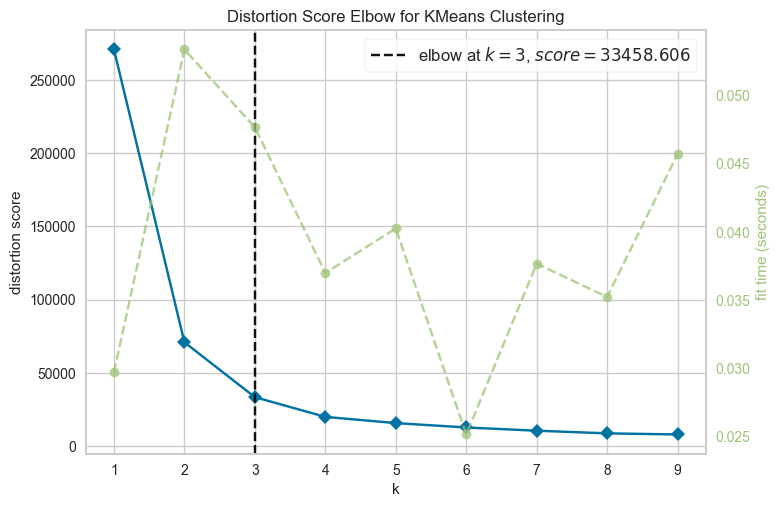

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(nbs_df_clean)
visualizer.show()

keterangan: menggunakan Elbow Method di atas diperoleh kesimpulan bahwa cluster = 3 merupakan yang optimal

In [ ]:
kmeans_optimal = KMeans(n_clusters=3, random_state=0)
kmeans_optimal.fit(nbs_df_clean)

labels_optimal = kmeans_optimal.labels_

silhouette = silhouette_score(nbs_df_clean, labels_optimal)
print(f"Silhouette Score untuk jumlah cluster optimal (3): {silhouette}")

Silhouette Score untuk jumlah cluster optimal (3): 0.5659101336743714


c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(nbs_df_clean)

labels = kmeans.labels_
nbs_df_clean["Cluster"] = labels

print("Label Cluster:\n", labels)
print("\nData dengan Label Cluster:\n", nbs_df_clean.head())

Label Cluster:
 [1 1 1 ... 0 1 0]

Data dengan Label Cluster:
    Product_Label  Category_Label  Unit_Price_Log_Std  Quantity_Log_Std  \
0             13               1           -0.247533          1.415232   
1             10               2           -0.247533          0.158149   
4             12               1           -0.338455         -1.064099   
5             26               0            1.068988          1.006638   
6             23               2           -0.297987         -0.897176   

   Discount  Total_Price_Log_Std  Cluster  
0      0.10             0.838416        1  
1      0.05             0.000276        1  
4      0.00            -0.923331        1  
5      0.05             1.542487        2  
6      0.00            -0.767045        2  


c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

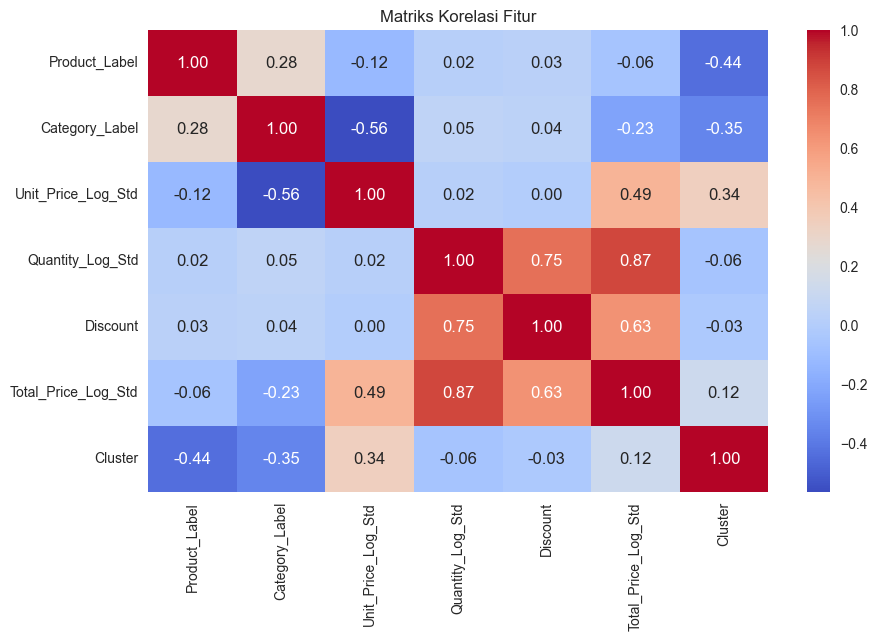

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(nbs_df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

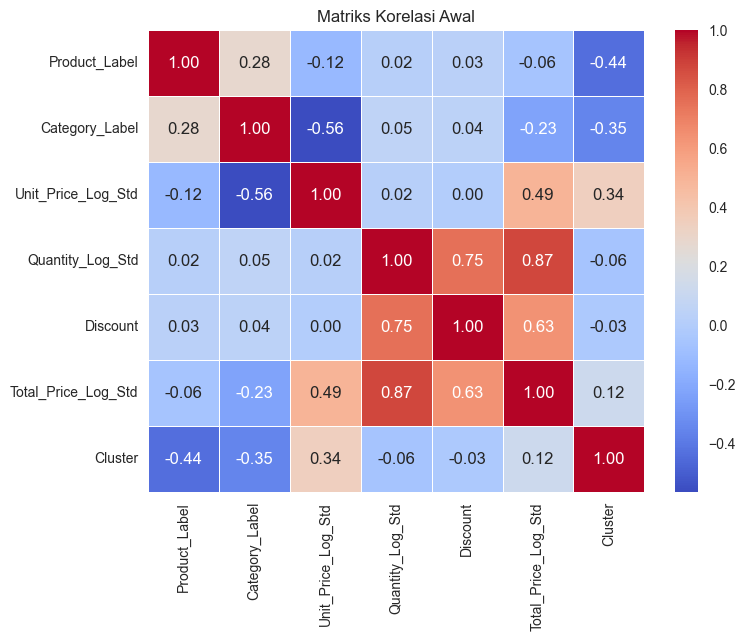

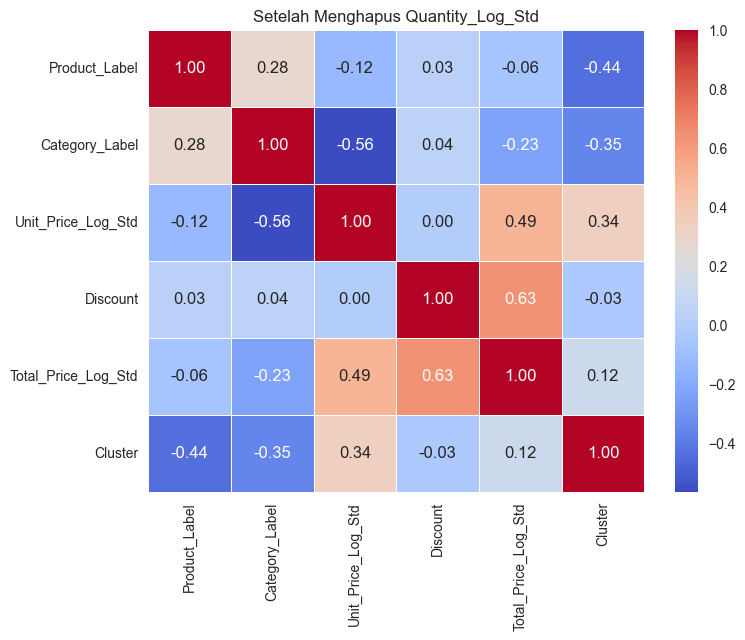

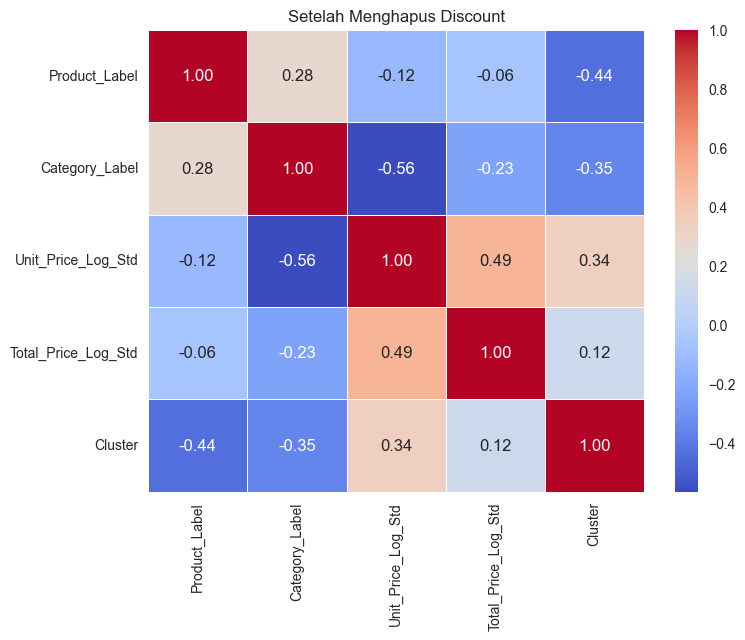

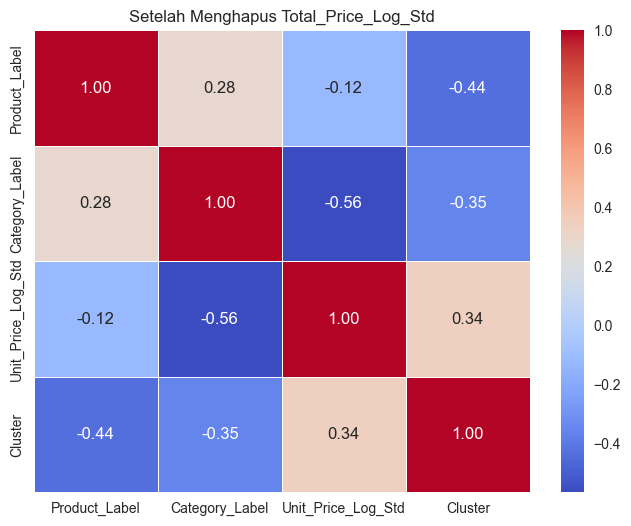

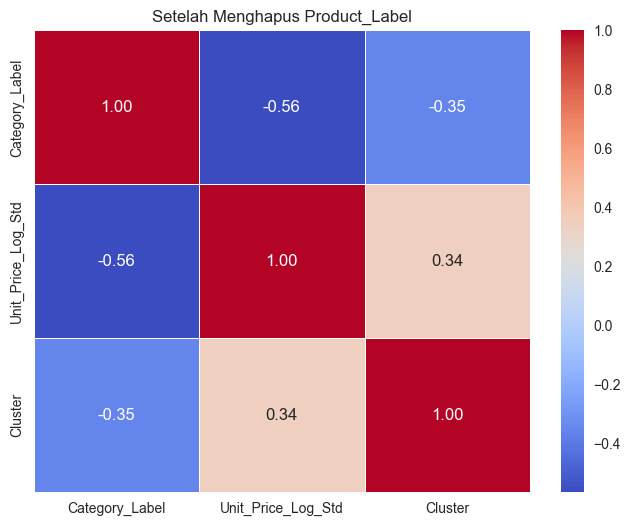

In [ ]:
# memeriksa korelasi antar fitur (tanpa memperhatikan 'Cluster')
correlation_matrix = nbs_df_clean.corr()

def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

plot_correlation_matrix(correlation_matrix, "Matriks Korelasi Awal")

# 1. Hapus Quantity_Log_Std
nbs_df_1 = nbs_df_clean.drop(columns=["Quantity_Log_Std"])
correlation_matrix_1 = nbs_df_1.corr()
plot_correlation_matrix(correlation_matrix_1, "Setelah Menghapus Quantity_Log_Std")

# 2. Hapus Discount
nbs_df_2 = nbs_df_1.drop(columns=["Discount"])
correlation_matrix_2 = nbs_df_2.corr()
plot_correlation_matrix(correlation_matrix_2, "Setelah Menghapus Discount")

# 3. Hapus Total_Price_Log_Std (jika perlu)
nbs_df_3 = nbs_df_2.drop(columns=["Total_Price_Log_Std"])
correlation_matrix_3 = nbs_df_3.corr()
plot_correlation_matrix(correlation_matrix_3, "Setelah Menghapus Total_Price_Log_Std")

# 4. Hapus Total_Product_Label (jika perlu)
nbs_df_4 = nbs_df_3.drop(columns=["Product_Label"])
correlation_matrix_4 = nbs_df_4.corr()
plot_correlation_matrix(correlation_matrix_4, "Setelah Menghapus Product_Label")

keterangan: selanjutnya akan dilakukan kmeans clustering dengan cara menghilangkan fitur-fitur dengan korelasi tinggi antar fiturnya. sudah dilakukan percobaan menghilangkan fitur dan dilatih dengan kmeans, diperoleh hasil terbaik sebagai berikut:

In [ ]:
# Drop fitur berkorelasi tinggi dan "Cluster" pada percobaan sebelumnya
nbs_df_reduced = nbs_df_clean.drop(columns=["Quantity_Log_Std", "Discount", "Total_Price_Log_Std", "Product_Label", "Cluster"])

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(nbs_df_reduced)

# Simpan label cluster dan mulai dari 1, bukan 0
nbs_df_reduced['Cluster'] = kmeans.labels_ + 1

print("Label Cluster:\n", kmeans.labels_ + 1)
print("\nData dengan Label Cluster:\n", nbs_df_reduced.head())


Label Cluster:
 [3 4 3 ... 2 3 2]

Data dengan Label Cluster:
    Category_Label  Unit_Price_Log_Std  Cluster
0               1           -0.247533        3
1               2           -0.247533        4
4               1           -0.338455        3
5               0            1.068988        1
6               2           -0.297987        4


c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\

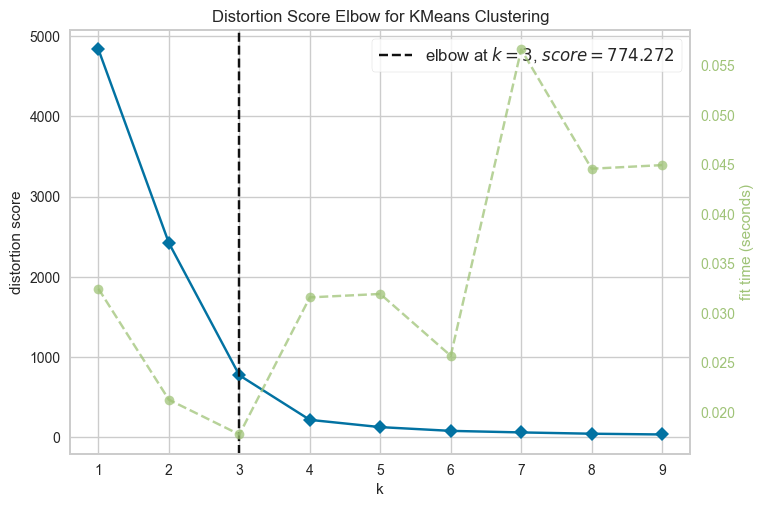

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(nbs_df_reduced)
visualizer.show()

keterangan: dengan menggunakan Elbow Method, diperoleh titik optimal k = 3, tetapi k > 3 diperbolehkan karena inertia/distortion semakin kecil. namun, hal tersebut bisa menyebabkan overfitting jika dataset kecil, sehingga perlu dilakukan pemeriksaan dengann silhouette score. semakin besar k, semakin tinggi sscore, maka model kemungkinan aman.

In [ ]:
kmeans_optimal = KMeans(n_clusters=4, random_state=0)
kmeans_optimal.fit(nbs_df_reduced)

labels_optimal = kmeans_optimal.labels_

silhouette = silhouette_score(nbs_df_reduced, labels_optimal)
print(f"Silhouette Score untuk jumlah cluster optimal (4): {silhouette}")

Silhouette Score untuk jumlah cluster optimal (4): 0.8068932146739669


c:\users\cikar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


keterangan: Silhouette Score mengalami peningkatan setelah dilakukan feature selection dari 0.566 menjadi di atas 0.8. diambil k = 4 karena hasil sscore k = 4 lebih tinggi dibanding k = 3, jika k > 5 hasil sscore akan semakin turun.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

keterangan: karena hanya ada 2 fitur, maka cukup dengan scatter plot saja untuk memvisualkan kelompok/cluster

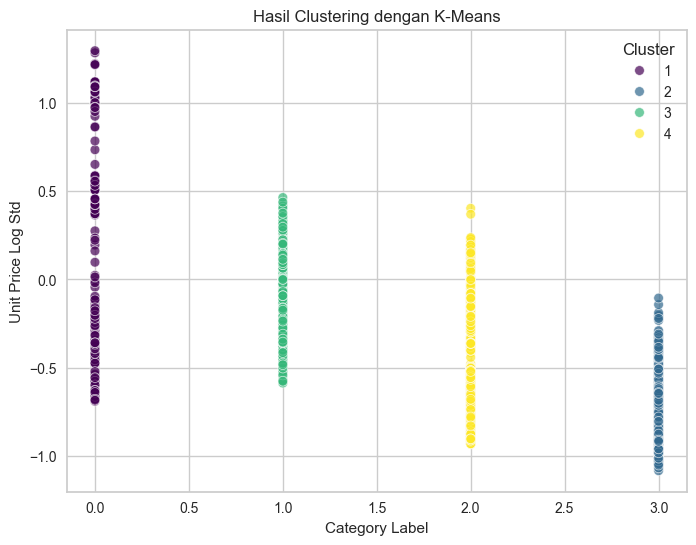

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=nbs_df_reduced["Category_Label"],
                y=nbs_df_reduced["Unit_Price_Log_Std"],
                hue=nbs_df_reduced["Cluster"],
                palette="viridis",
                alpha=0.7)

plt.title("Hasil Clustering dengan K-Means")
plt.xlabel("Category Label")
plt.ylabel("Unit Price Log Std")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(nbs_df_reduced)

# Simpan label cluster dan mulai dari 1, bukan 0
nbs_df_reduced['Cluster'] = kmeans.labels_ + 1

print("Label Cluster:\n", kmeans.labels_ + 1)
print("\nData dengan Label Cluster:\n", nbs_df_reduced.head())

Label Cluster:
 [4 2 4 ... 3 4 3]

Data dengan Label Cluster:
    Category_Label  Unit_Price_Log_Std  Cluster
0               1           -0.247533        4
1               2           -0.247533        2
4               1           -0.338455        4
5               0            1.068988        1
6               2           -0.297987        2


In [ ]:
nbs_df_reduced

,Category_Label,Unit_Price_Log_Std,Cluster
0,1,-0.247533,4
1,2,-0.247533,2
4,1,-0.338455,4
5,0,1.068988,1
6,2,-0.297987,2
...,...,...,...
2994,1,-0.092280,4
2996,3,-0.507616,3
2997,3,-0.309970,3
2998,1,-0.415319,4


In [ ]:
# untuk data kategorik (encoding)
# Pastikan menggunakan encoder yang sama saat encoding

nbs_df_reduced["Category"] = label_encoder.inverse_transform(nbs_df_reduced["Category_Label"])
print(nbs_df_reduced[["Category_Label", "Category"]].head())

   Category_Label             Category
0               1               Juices
1               2          Soft Drinks
4               1               Juices
5               0  Alcoholic Beverages
6               2          Soft Drinks


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# untuk data numerik (log transformasi dan standarisasi)

nbs_df_reduced[["Unit_Price_Log"]] = scaler.inverse_transform(nbs_df_reduced[["Unit_Price_Log_Std"]])
nbs_df_reduced["Unit_Price"] = np.expm1(nbs_df_reduced["Unit_Price_Log"])
print(nbs_df_reduced[["Unit_Price_Log_Std", "Unit_Price_Log", "Unit_Price"]].head())

   Unit_Price_Log_Std  Unit_Price_Log  Unit_Price
0           -0.247533        3.100680   21.213052
1           -0.247533        3.100680   21.213052
4           -0.338455        2.955671   18.214620
5            1.068988        5.200357  180.337053
6           -0.297987        3.020212   19.495636


In [ ]:
nbs_df_reduced

,Category_Label,Unit_Price_Log_Std,Cluster,Category,Unit_Price_Log,Unit_Price
0,1,-0.247533,4,Juices,3.100680,21.213052
1,2,-0.247533,2,Soft Drinks,3.100680,21.213052
4,1,-0.338455,4,Juices,2.955671,18.214620
5,0,1.068988,1,Alcoholic Beverages,5.200357,180.337053
6,2,-0.297987,2,Soft Drinks,3.020212,19.495636
...,...,...,...,...,...,...
2994,1,-0.092280,4,Juices,3.348288,27.453981
2996,3,-0.507616,3,Water,2.685882,13.671130
2997,3,-0.309970,3,Water,3.001101,19.107654
2998,1,-0.415319,4,Juices,2.833083,15.997792


In [ ]:
final_beverage_sales = nbs_df_reduced[["Category", "Unit_Price", "Cluster"]]
final_beverage_sales

,Category,Unit_Price,Cluster
0,Juices,21.213052,4
1,Soft Drinks,21.213052,2
4,Juices,18.214620,4
5,Alcoholic Beverages,180.337053,1
6,Soft Drinks,19.495636,2
...,...,...,...
2994,Juices,27.453981,4
2996,Water,13.671130,3
2997,Water,19.107654,3
2998,Juices,15.997792,4


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### Distribusi Cluster

In [ ]:
cluster_summary = final_beverage_sales.groupby("Cluster").agg({
    "Unit_Price": ["mean", "median", "min", "max", "count"],
    "Category": lambda x: x.mode()[0]  # Ambil kategori yang paling sering muncul
}).reset_index()

cluster_summary.columns = ["Cluster", "Avg_Unit_Price", "Median_Unit_Price", "Min_Unit_Price", "Max_Unit_Price", "Count", "Most_Common_Category"]
print(cluster_summary)

   Cluster  Avg_Unit_Price  Median_Unit_Price  Min_Unit_Price  Max_Unit_Price  \
0        1       44.705478          19.301645        9.954927      259.795653   
1        2       19.192679          16.178520        6.453590       61.746008   
2        3       10.947209          10.154826        4.844551       26.859727   
3        4       33.076395          32.078968       11.915341       68.137701   

   Count Most_Common_Category  
0    356  Alcoholic Beverages  
1    566          Soft Drinks  
2    526                Water  
3    479               Juices  


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

### Cluster 1:
- **Rata-rata Unit Price:** 44.71
- **Median Unit Price:** 19.30
- **Rentang Harga:** 9.95 - 259.80
- **Jumlah Data dalam Cluster:** 356
- **Kategori Terbanyak:** Alcoholic Beverages  
**Analisis:**  
Cluster ini memiliki harga rata-rata yang paling tinggi dengan rentang harga yang cukup besar. Produk dalam cluster ini didominasi oleh kaegori *Alcoholic Beerages*, yang umumnya memang memiliki harga lebih tinggi dibandingkan kategori lain.

### Cluster 2:
- **Rata-rata Unit Price:** 19.19
- **Median Unit Price:** 16.18
- **Rentang Harga:** 6.45 - 61.75
- **Jumlah Data dalam Cluster:** 566
- **Kategori Terbanyak:** Soft Drinks  
**Analisis:**  
Cluster ini memiliki harga yang lebih rendah dibandingkan cluster 1, tetapi masih cukup bervariasi. Doinasi kategri *Soft Drinks* menunjukkan bahwa produk dalam cluster ini adalah minuman ringan yang lebih terjangkau.

### Cluster 3:
- **Rata-rata Unit Price:** 10.95
- **Median Unit Price:** 10.15
- **Rentang Harga:** 4.84 - 26.86
- **Jumlah Data dalam Cluster:** 526
- **Kategori Terbanyak:** Water  
**Analisis:**  
Cluster ini memiliki harga yang paling rendah, dengan produk mayorits bersal dari kategori *Water*. Ini menunjukkan bahwa produk dalam cluster ini cenderung lebih murah dan memiliki variasi harga yang lebih kecil.

### Cluster 4:
- **Rata-rata Unit Price:** 33.08
- **Median Unit Price:** 32.08
- **Rentang Harga:** 11.92 - 68.14
- **Jumlah Data dalam Cluster:** 479
- **Kategori Terbanyak:** Juices  
**Analisis:**  
Cluster ini memiliki harga menengah ke atas, dengan dominasi kategori *Juices*. Produk dalam cluster ini mungkin terdiri dari minuman jus premium yang memiliki harga lebih tinggi dibandingkan *Soft Drinks* tetapi lebih rendah diandingkan *Alcoholic Beverages*.



# Kesimpulan:
- **Cluster 1** berisi produk premium (*Alcoholic Beverages*) dengan harga tinggi dan rentang yang besar.
- **Cluster 2** berisi minuman ringan (*Soft Drinks*) dengan harga menengah.
- **Cluster 3** berisi air mineral (*Water*), yang umumnya memiliki harga lebih rendah.
- **Cluster 4** berisi jus (*Juices*), yang memiliki harga menengah ke atas.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

### Merge Data

Data dikembalikan menjadi 6 fitur awal + 1 cluster (label) menggunakan merge data final_beverage_sales dan data awal clustering (bevsales)

In [ ]:
bevsales

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Unit_Price_Log,Unit_Price_Log_Std,Quantity_Log,Quantity_Log_Std,Total_Price_Log,Total_Price_Log_Std
0,Hohes C Orange,Juices,1.87,74,0.10,124.54,1.054312,-0.247533,4.317488,1.415232,4.832624,0.838416
1,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,1.054312,-0.247533,2.944439,0.158149,3.495901,0.000276
2,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,2.568022,1.400071,4.276666,1.377858,6.589765,1.940162
3,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,4.188290,3.163660,4.521789,1.602278,8.578689,3.187239
4,Granini Apple,Juices,1.64,4,0.00,6.56,0.970779,-0.338455,1.609438,-1.064099,2.022871,-0.923331
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Jack Daniels,Alcoholic Beverages,52.27,88,0.05,4369.77,3.975373,2.931910,4.488636,1.571925,8.382694,3.064348
2996,Evian,Water,1.26,12,0.00,15.12,0.815365,-0.507616,2.564949,-0.189289,2.780061,-0.448564
2997,Vio Wasser,Water,1.71,11,0.00,18.81,0.996949,-0.309970,2.484907,-0.262572,2.986187,-0.319321
2998,Granini Apple,Juices,1.46,14,0.05,19.42,0.900161,-0.415319,2.708050,-0.058275,3.016515,-0.300305


In [ ]:
bevsales2 = bevsales[["Product", "Category", "Unit_Price", "Quantity", "Discount", "Total_Price"]]

In [ ]:
# memastikan kedua data memiliki index
final_beverage_sales = final_beverage_sales.reset_index()
bevsales2 = bevsales2.reset_index()

In [ ]:
bevsales2

,index,Product,Category,Unit_Price,Quantity,Discount,Total_Price
0,0,Hohes C Orange,Juices,1.87,74,0.10,124.54
1,1,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98
2,2,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61
3,3,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13
4,4,Granini Apple,Juices,1.64,4,0.00,6.56
...,...,...,...,...,...,...,...
2318,2995,Jack Daniels,Alcoholic Beverages,52.27,88,0.05,4369.77
2319,2996,Evian,Water,1.26,12,0.00,15.12
2320,2997,Vio Wasser,Water,1.71,11,0.00,18.81
2321,2998,Granini Apple,Juices,1.46,14,0.05,19.42


In [ ]:
# memastikan final_beverage_sales dan bevsales menggunakan index yang benar
final_beverage_sales = final_beverage_sales.set_index("index")
bevsales2 = bevsales2.set_index("index")

In [ ]:
# Merge menggunakan index dan Category (left join agar hasilnya mengikuti final_beverage_sales)
merged_df2 = final_beverage_sales.merge(bevsales2, on=["index", "Category"], how="left")

# Pastikan index tetap mengikuti final_beverage_sales
merged_df2 = merged_df2.reset_index().set_index("index")
merged_df2.head()

,Category,Unit_Price_x,Cluster,Product,Unit_Price_y,Quantity,Discount,Total_Price
index,,,,,,,,
0,Juices,21.213052,4,Hohes C Orange,1.87,74,0.10,124.54
1,Soft Drinks,21.213052,2,Fritz-Kola,1.87,18,0.05,31.98
4,Juices,18.214620,4,Granini Apple,1.64,4,0.00,6.56
5,Alcoholic Beverages,180.337053,1,Riesling,8.62,47,0.05,384.88
6,Soft Drinks,19.495636,2,Pepsi,1.74,5,0.00,8.70


In [ ]:
merged_df2 = merged_df2[["Category", "Cluster", "Product", "Unit_Price_y", "Quantity", "Discount", "Total_Price"]]
merged_df2 = merged_df2.rename(columns={"Unit_Price_y": "Unit_Price"})

In [ ]:
merged_df2

,Category,Cluster,Product,Unit_Price,Quantity,Discount,Total_Price
index,,,,,,,
0,Juices,4,Hohes C Orange,1.87,74,0.10,124.54
1,Soft Drinks,2,Fritz-Kola,1.87,18,0.05,31.98
4,Juices,4,Granini Apple,1.64,4,0.00,6.56
5,Alcoholic Beverages,1,Riesling,8.62,47,0.05,384.88
6,Soft Drinks,2,Pepsi,1.74,5,0.00,8.70
...,...,...,...,...,...,...,...
2994,Juices,4,Passion Fruit Juice,2.31,4,0.05,8.78
2996,Water,3,Evian,1.26,12,0.00,15.12
2997,Water,3,Vio Wasser,1.71,11,0.00,18.81


In [ ]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     1927 non-null   object 
 1   Cluster      1927 non-null   int32  
 2   Product      1927 non-null   object 
 3   Unit_Price   1927 non-null   float64
 4   Quantity     1927 non-null   int64  
 5   Discount     1927 non-null   float64
 6   Total_Price  1927 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 112.9+ KB


In [ ]:
merged_df2.to_csv("Dataset_inisiasi.csv", index=False)